# 📍 Recipe: Touch Location Heatmap for a Player

In this example, we'll generate a heatmap of where a single player touched the ball during a match using StatsBomb open data.

We'll use Flow to filter events, extract coordinates, and then visualize the result using mplsoccer.

## 🧰 What You'll Learn

- How to load a StatsBomb match file using Flow.statsbomb.from_github_file
- How to filter events to those involving a given player
- How to extract location data using .assign() or .split_array()
- How to plot a positional heatmap with mplsoccer

## Imports

In [1]:
from penaltyblog.matchflow import Flow, get_field
from mplsoccer import Pitch

## Load the Data

In [2]:
# Load events for a StatsBomb match
match_id = 22912  # Champions League Final 2018/2019

flow = Flow.statsbomb.from_github_file(match_id=match_id)

## Filter Events

In [ ]:
touches = (
    flow
    .filter(where_equals(get_field("type.name"), "Shot"))
    .split_array("location", into=["x", "y"])
    .select("x", "y")
    .collect()
)

## Plot Heatmap of Touches

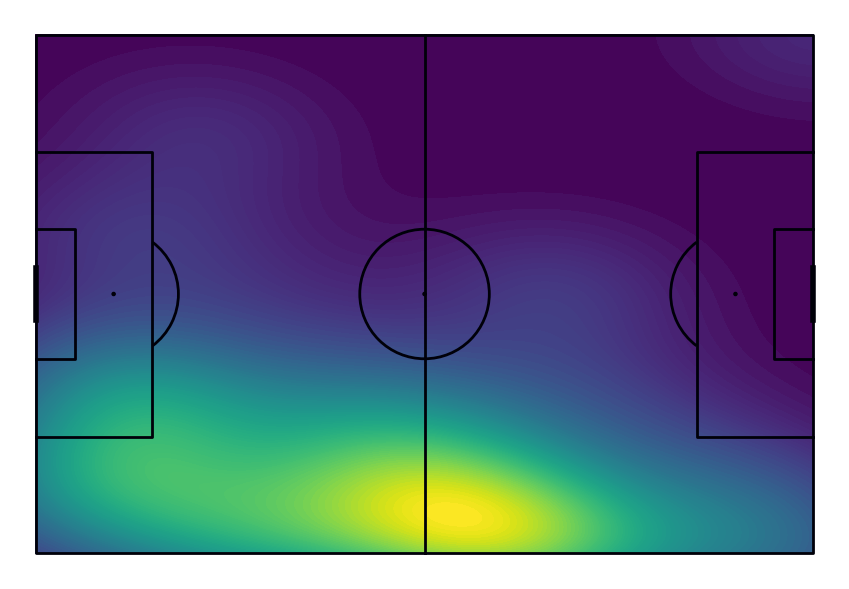

In [4]:
x = [r["x"] for r in touches]
y = [r["y"] for r in touches]

pitch = Pitch(line_color="#000009", line_zorder=2)
fig, ax = pitch.draw(figsize=(10, 6))

kde = pitch.kdeplot(
    x,
    y,
    ax=ax,
    fill=True,
    levels=100,
    thresh=0,
    cut=4,
    cmap="viridis",
)